# 5

In [1]:
library(ISLR)
summary(Default)

 default    student       balance           income     
 No :9667   No :7056   Min.   :   0.0   Min.   :  772  
 Yes: 333   Yes:2944   1st Qu.: 481.7   1st Qu.:21340  
                       Median : 823.6   Median :34553  
                       Mean   : 835.4   Mean   :33517  
                       3rd Qu.:1166.3   3rd Qu.:43808  
                       Max.   :2654.3   Max.   :73554  

In [2]:
attach(Default)

In [12]:
set.seed(1)
glm.fit=glm(default~income+student,data=Default,family = binomial)

In [15]:
fiveb = function(){
    train=sample(dim(Default)[1],dim(Default)[1]/2)
    glm.fit=glm(default~income+student,data = Default,family = binomial,subset = train)
    glm.pred=rep("No",dim(Default)[1]/2)
    glm.probs=predict(glm.fit,Default[-train,],type="response")
    glm.pred[glm.probs>0.5]="Yes"
    return (mean(glm.pred!=Default[-train,]$default))
}
fiveb()

[1] 0.0348

In [16]:
fiveb()
fiveb()
fiveb()

[1] 0.0324

[1] 0.0336

[1] 0.0364

In [17]:
glm.fit=glm(default~.,data=Default,family = binomial)
train=sample(dim(Default)[1],dim(Default)[1]/2)
glm.pred=rep("No",dim(Default)[1]/2)
glm.probs=predict(glm.fit,Default[-train,],type="response")
glm.pred[glm.probs>0.5]="Yes"
mean(glm.pred!=Default[-train,]$default)

[1] 0.0266

# 6

In [18]:
library(ISLR)
summary(Default)
attach(Default)

 default    student       balance           income     
 No :9667   No :7056   Min.   :   0.0   Min.   :  772  
 Yes: 333   Yes:2944   1st Qu.: 481.7   1st Qu.:21340  
                       Median : 823.6   Median :34553  
                       Mean   : 835.4   Mean   :33517  
                       3rd Qu.:1166.3   3rd Qu.:43808  
                       Max.   :2654.3   Max.   :73554  

The following objects are masked from Default (pos = 3):

    balance, default, income, student




In [19]:
set.seed(1)
glm.fit = glm(default ~ income + balance, data = Default, family = binomial)
summary(glm.fit)


Call:
glm(formula = default ~ income + balance, family = binomial, 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4725  -0.1444  -0.0574  -0.0211   3.7245  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.154e+01  4.348e-01 -26.545  < 2e-16 ***
income       2.081e-05  4.985e-06   4.174 2.99e-05 ***
balance      5.647e-03  2.274e-04  24.836  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1579.0  on 9997  degrees of freedom
AIC: 1585

Number of Fisher Scoring iterations: 8


In [29]:
boot.fn=function(data,index)(
    return (coef(glm(default ~ income + balance, data = data, family = binomial, subset = index))))

In [30]:
library(boot)
boot(Default,boot.fn,50)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Default, statistic = boot.fn, R = 50)


Bootstrap Statistics :
         original        bias     std. error
t1* -1.154047e+01  2.357181e-02 4.186559e-01
t2*  2.080898e-05 -4.272830e-08 4.745593e-06
t3*  5.647103e-03 -1.707871e-05 1.935305e-04

# 7

In [31]:
library(ISLR)
summary(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

In [32]:
set.seed(1)
attach(Weekly)

In [33]:
glm.fit=glm(Direction~ Lag1 + Lag2, data = Weekly, family = binomial)
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2, family = binomial, data = Weekly)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.623  -1.261   1.001   1.083   1.506  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.22122    0.06147   3.599 0.000319 ***
Lag1        -0.03872    0.02622  -1.477 0.139672    
Lag2         0.06025    0.02655   2.270 0.023232 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1488.2  on 1086  degrees of freedom
AIC: 1494.2

Number of Fisher Scoring iterations: 4


In [35]:
glm.fit = glm(Direction ~ Lag1 + Lag2, data = Weekly[-1, ], family = binomial)
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2, family = binomial, data = Weekly[-1, 
    ])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6258  -1.2617   0.9999   1.0819   1.5071  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.22324    0.06150   3.630 0.000283 ***
Lag1        -0.03843    0.02622  -1.466 0.142683    
Lag2         0.06085    0.02656   2.291 0.021971 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1494.6  on 1087  degrees of freedom
Residual deviance: 1486.5  on 1085  degrees of freedom
AIC: 1492.5

Number of Fisher Scoring iterations: 4


In [36]:
predict.glm(glm.fit, Weekly[1, ], type = "response") > 0.5

1 
TRUE

In [50]:
count = rep(0, dim(Weekly)[1])
for (i in 1:(dim(Weekly)[1])) {
    glm.fit = glm(Direction ~ Lag1 + Lag2, data = Weekly[-i, ], family = binomial)
    is_up = predict.glm(glm.fit, Weekly[i, ], type = "response") > 0.5
    is_true_up = Weekly[i, ]$Direction == "Up"
    if (is_up != is_true_up) 
        count[i] = 1
}
sum(count)

[1] 490

In [51]:
mean(count)

[1] 0.4499541

# 8

In [52]:
set.seed(1)
y = rnorm(100)
x = rnorm(100)
y = x - 2 * x^2 + rnorm(100)

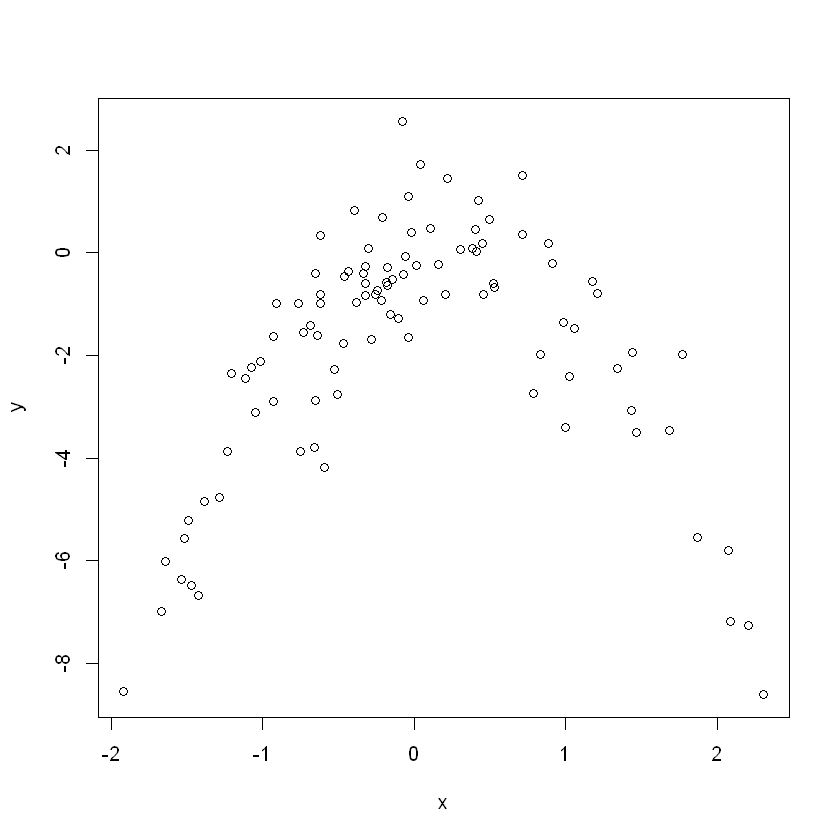

In [53]:
plot(x,y)

In [54]:
library(boot)
Data=data.frame(x,y)
set.seed(1)
glm.fit=glm(y~x)
cv.glm(Data,glm.fit)$delta

[1] 5.890979 5.888812

In [55]:
glm.fit = glm(y ~ poly(x, 2))
cv.glm(Data, glm.fit)$delta

[1] 1.086596 1.086326

In [56]:
glm.fit = glm(y ~ poly(x, 3))
cv.glm(Data, glm.fit)$delta

[1] 1.102585 1.102227

In [57]:
glm.fit = glm(y ~ poly(x, 4))
cv.glm(Data, glm.fit)$delta

[1] 1.114772 1.114334

In [58]:
set.seed(5)
glm.fit=glm(y~x)
cv.glm(Data,glm.fit)$delta

[1] 5.890979 5.888812

In [59]:
glm.fit = glm(y ~ poly(x, 2))
cv.glm(Data, glm.fit)$delta

[1] 1.086596 1.086326

In [60]:
glm.fit = glm(y ~ poly(x, 3))
cv.glm(Data, glm.fit)$delta

[1] 1.102585 1.102227

In [61]:
glm.fit = glm(y ~ poly(x, 4))
cv.glm(Data, glm.fit)$delta

[1] 1.114772 1.114334

In [62]:
summary(glm.fit)


Call:
glm(formula = y ~ poly(x, 4))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8914  -0.5244   0.0749   0.5932   2.7796  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.8277     0.1041 -17.549   <2e-16 ***
poly(x, 4)1   2.3164     1.0415   2.224   0.0285 *  
poly(x, 4)2 -21.0586     1.0415 -20.220   <2e-16 ***
poly(x, 4)3  -0.3048     1.0415  -0.293   0.7704    
poly(x, 4)4  -0.4926     1.0415  -0.473   0.6373    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 1.084654)

    Null deviance: 552.21  on 99  degrees of freedom
Residual deviance: 103.04  on 95  degrees of freedom
AIC: 298.78

Number of Fisher Scoring iterations: 2


# 9

In [63]:
library(MASS)
summary(Boston)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

In [64]:
set.seed(1)
attach(Boston)

In [65]:
medv.mean=mean(medv)
medv.mean

[1] 22.53281

In [66]:
medv.err = sd(medv)/sqrt(length(medv))
medv.err

[1] 0.4088611

In [67]:
boot.fn = function(data, index) return(mean(data[index]))
library(boot)
bstrap = boot(medv, boot.fn, 1000)
bstrap


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = medv, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
    original      bias    std. error
t1* 22.53281 0.007650791   0.4106622

In [68]:
t.test(medv)


	One Sample t-test

data:  medv
t = 55.111, df = 505, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 21.72953 23.33608
sample estimates:
mean of x 
 22.53281 


In [69]:
c(bstrap$t0 - 2 * 0.4106622, bstrap$t0 + 2 * 0.4106622)

[1] 21.71148 23.35413

In [70]:
medv.med = median(medv)
medv.med

[1] 21.2

In [72]:
boot.fn = function(data, index) return(median(data[index]))
boot(medv, boot.fn, 1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = medv, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
    original  bias    std. error
t1*     21.2 -0.0386   0.3770241

In [73]:
medv.tenth = quantile(medv, c(0.1))
medv.tenth

10% 
12.75

In [74]:
boot.fn = function(data, index) return(quantile(data[index], c(0.1)))
boot(medv, boot.fn, 1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = medv, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
    original  bias    std. error
t1*    12.75  0.0186   0.4925766